In [1]:
#Get all packages needed
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
warnings.filterwarnings("ignore")

In [5]:
kmpgex = pd.ExcelFile('KPMG_final.xlsx')
kmpgex.sheet_names
df = pd.read_excel('KPMG.xlsx', sheet_name="NewCustomerList")
#list(df)

In [6]:
# rename for easier analysis
df.rename(columns={"Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ":"fname"}, inplace = True)
df.rename(columns={"Unnamed: 1":"lname",
                   "Unnamed: 2":"gender",
                   "Unnamed: 3":"3y_bike_purchases",
                   "Unnamed: 4":"DOB",
                   "Unnamed: 5":"JT",
                   "Unnamed: 6":"Category"}, inplace = True)
df.rename(columns={"Unnamed: 7":"wealth_segement",
                   "Unnamed: 8":"D_Indicator",
                   "Unnamed: 9":"owns_car",
                   "Unnamed: 10":"tencure",
                   "Unnamed: 11":"address",
                   "Unnamed: 12":"postcode"}, inplace = True)
df.rename(columns={"Unnamed: 13":"state",
                   "Unnamed: 14":"country",
                   "Unnamed: 15":"prop_val",
                   "Unnamed: 21":"rank",
                   "Unnamed: 22":"value"}, inplace = True)
df=df.iloc[1:]
df

,fname,lname,gender,3y_bike_purchases,DOB,JT,Category,wealth_segement,D_Indicator,owns_car,...,state,country,prop_val,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,rank,value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.92,1.1500,1.437500,1.221875,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,1.03,1.0300,1.287500,1.094375,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.75,0.7500,0.750000,0.750000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.75,0.9375,0.937500,0.937500,4.0,4,1.703125
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.60,0.6000,0.750000,0.750000,4.0,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.43,0.4300,0.430000,0.430000,996.0,996,0.374
997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.88,0.8800,1.100000,0.935000,997.0,997,0.357
998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,1.06,1.3250,1.325000,1.325000,997.0,997,0.357
999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,1.07,1.3375,1.337500,1.136875,997.0,997,0.357


In [7]:
def check_NA():
    ret = []
    temp = list(df)
    for each in temp:
        ret.append(df[each].isna().sum())
    return ret

NaNlist = check_NA()
print(NaNlist, len(NaNlist))
# need to check columns
check = []
k     = -1
for i in NaNlist:
    k += 1
    if i > 0:
        check.append(k)
def check_unique():
    temp = list(df)
    mydict = {}
    for i in range(2, 23):
        ct = 0
        if NaNlist[i] > 0:
            ct = len(df[temp[i]].unique()) - 1
        else:
            ct = len(df[temp[i]].unique())
        mydict[temp[i]] = (ct, df[temp[i]].unique())
    return mydict

[0, 29, 0, 0, 17, 106, 165, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 23


In [8]:
check_unique()["gender"] #no F or M, easier to analyze

(3, array(['Male', 'Female', 'U'], dtype=object))

[513, 470, 17]


([<matplotlib.axis.XTick at 0x25238d20790>,
 [Text(0, 0, 'Female'),
  Text(1, 0, "F's P"),
  Text(2, 0, 'Male'),
  Text(3, 0, "M's P"),
  Text(4, 0, 'Unknown'),
  Text(5, 0, "U's P")])

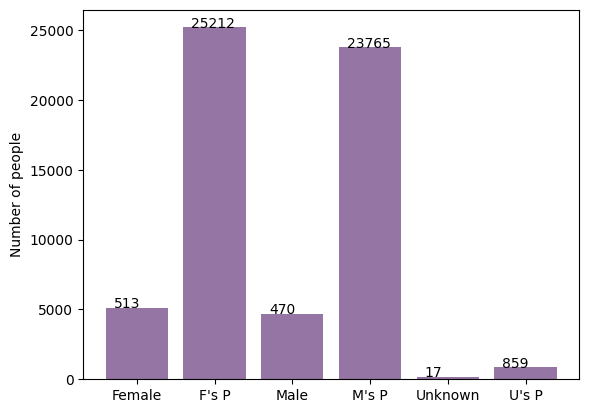

In [9]:
#Analyze the Gender vs Bikes bought
#array(['F', 'Male', 'Female', 'U', 'Femal', 'M'] from KPMG_VI.py
gender = [0,0,0] #first is Female, second if Male, third is Unknown
for each in df['gender']:
    if each[0] == "F":
        gender[0] += 1
    elif each[0] == "M":
        gender[1] += 1
    else:
        gender[2] += 1

print(gender)
def gf(x, pos):
    #'The two args are the value and gender'
    return int(x)

bike = [0,0,0]
df[['3y_bike_purchases']] = df[['3y_bike_purchases']].apply(pd.to_numeric)
bike[0] += df['3y_bike_purchases'][df['gender'] == 'Female'].sum() 
bike[1] += df['3y_bike_purchases'][df['gender'] == 'Male'].sum()
bike[2] += df['3y_bike_purchases'][df['gender'] == 'U'].sum()

grapho = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graphl = [gender[0]*10, bike[0], gender[1]*10, bike[1], gender[2]*10, bike[2]]
colorr = (0.3,0.1,0.4,0.6)
#scale up gender by 10 for easier visualization
formatter = FuncFormatter(gf)
x = np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, graphl, color = colorr)
for i in range(len(gender*2)):
    plt.text(x = i-0.3, y = graphl[i]+0.1, s = grapho[i], size = 10)

plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unknown', "U's P"))

([<matplotlib.axis.XTick at 0x25239a5cd00>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Unknown')])

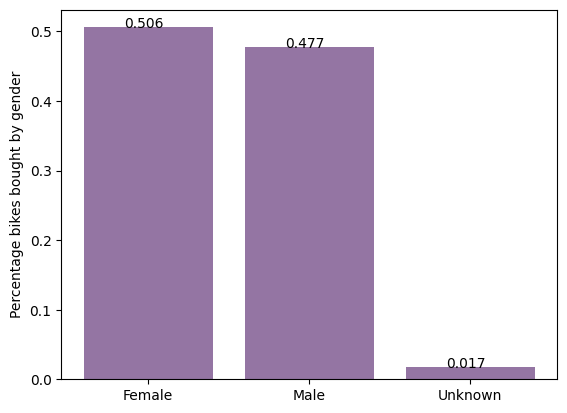

In [10]:
avg  = [0,0,0]
ss   = sum(bike)
for i in range(len(avg)):
    avg[i] += round(bike[i]/ss,3) 

x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes bought by gender')
plt.bar(x1, avg, color = colorr)
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 10)

plt.xticks(x1, ('Female', 'Male', 'Unknown'))


In [11]:
check_unique()["DOB"]

(961,
 array(['1957-07-12', '1970-03-22', datetime.datetime(1974, 8, 28, 0, 0),
        '1979-01-28', '1965-09-21', '1951-04-29', '1976-10-06',
        '1972-12-27', '1972-04-28', '1985-08-02', '1995-01-01',
        '1999-08-30', '1990-05-13', '1976-12-09', '1964-04-19',
        '1954-03-31', '1993-08-22', datetime.datetime(1976, 6, 8, 0, 0),
        '1938-11-09', '1954-08-12', '1968-12-21', '1993-09-29',
        '1998-02-05', datetime.datetime(1977, 12, 17, 0, 0), '1982-10-11',
        '1945-08-03', '1952-06-27', '1966-07-20', '1960-12-10',
        '1960-11-22', '1980-01-26', '1951-11-28', '1987-01-15',
        '1981-09-22', datetime.datetime(1977, 5, 9, 0, 0), '1975-05-10',
        '1968-03-25', '1979-04-11', '1955-06-13', '1993-08-28',
        '1953-02-13', '1985-03-14', '1946-10-25', '1966-09-18',
        '1961-12-05', '1956-08-30', '1956-07-16', '1994-12-04',
        '1977-05-14', '1950-05-03', datetime.datetime(1978, 2, 11, 0, 0),
        '1999-03-22', '1993-12-19', '1981-12-01',

In [12]:
#Analyze on the age vs bikes bought
#Needs to transform
df["Age"] = 0
lenn = len(df["DOB"])
k    = 0
for i in range(1, lenn):
    #type is date
    if isinstance(df["DOB"][i], datetime.date):
        tl = len(df["DOB"][i].ctime().split(" "))
        print(int(df["DOB"][i].ctime().split(" ")[tl-1]))
        df["Age"][i] += int(2019 - int(df["DOB"][i].ctime().split(" ")[tl-1]))
    #type is string
    elif isinstance(df["DOB"][i], str):
        tl = len(df["DOB"][i].split("-"))
        df["Age"][i] += int(2019 - int(df["DOB"][i].split("-")[0])) 
    #time is float: means it's nan value so do nothing
#same index as above
ngenage = [0,0,0]
j       = 1
ss      = 0
stdv    = []
for each in df['gender']:
    if each[0] == "F" and df['Age'][j] != 0:
        ss   += df['Age'][j]
        stdv.append((df['Age'][j]))
        ngenage[0] += 1
    elif each[0] == "M" and df['Age'][j] != 0:
        ss += df['Age'][j]
        stdv.append((df['Age'][j]))
        ngenage[1] += 1
    elif df['Age'][j] != 0: 
        ss += df['Age'][j]
        stdv.append((df['Age'][j]))
        ngenage[2] += 1
    j += 1
df

1974
1976
1977
1977
1978
1975
1978
1978
1977
1976
1973
1979
1977
1976
1976
1978
1976
1978
1978
1974
1979
1978
1977
1973
1974
1975
1974
1976
1976
1973
1978
1975
1979
1973
1978
1976
1973
1976
1977
1974
1977
1974
1977
1975
1973
1979
1978
1974
1974
1973
1978
1975
1974
1974


,fname,lname,gender,3y_bike_purchases,DOB,JT,Category,wealth_segement,D_Indicator,owns_car,...,country,prop_val,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,rank,value,Age
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.92,1.1500,1.437500,1.221875,1.0,1,1.71875,62
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,1.03,1.0300,1.287500,1.094375,1.0,1,1.71875,49
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,0.75,0.7500,0.750000,0.750000,1.0,1,1.71875,45
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.75,0.9375,0.937500,0.937500,4.0,4,1.703125,40
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.60,0.6000,0.750000,0.750000,4.0,4,1.703125,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,Australia,7,0.43,0.4300,0.430000,0.430000,996.0,996,0.374,60
997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,Australia,10,0.88,0.8800,1.100000,0.935000,997.0,997,0.357,18
998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,Australia,2,1.06,1.3250,1.325000,1.325000,997.0,997,0.357,65
999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,Australia,2,1.07,1.3375,1.337500,1.136875,997.0,997,0.357,67


In [13]:
print(ss)
print(ngenage) # as we can see, unknonwn gender will unlikely to have age, don't care about gender U
#average age not counting 0 is 
mean_val = round(ss/sum(ngenage),0)
print(mean_val)
stdv_val = round(ma.sqrt(1/(sum(ngenage)-1)*sum((stdv - (ss/sum(ngenage)))**2)),0)
print(stdv_val)

47323
[513, 469, 0]
48.0
17.0


In [14]:
#pruchases from age 42 - 34/2, 42, 42 + 34/2 
age_dict = {}
f1  = []
bf1 = []
f2  = []
bf2 = []
f3  = []
bf3 = []
f4  = []
bf4 = []
m1  = []
bm1 = []
m2  = []
bm2 = []
m3  = []
bm3 = []
m4  = []
bm4 = []
fq = 42-34/2
sq = mean_val
tq = 42+34/2
jjj = 1
for each in df['gender']:
    temp = int(df['Age'][jjj])
    bkt  = int(df['3y_bike_purchases'][jjj])
    if each[0] == "F" and temp != 0:
        if(temp <= fq):
            f1.append(temp)
            bf1.append(bkt)
        elif(fq < temp and temp <= sq):
            f2.append(temp)
            bf2.append(bkt)
        elif(sq < temp and temp <= tq):
            f3.append(temp)
            bf3.append(bkt)
        elif(tq < temp):
            f4.append(temp)
            bf4.append(bkt)
    elif each[0] == "M" and temp != 0:
        if(temp <= fq):
            m1.append(temp)
            bm1.append(bkt)
        elif(fq < temp and temp <= sq):
            m2.append(temp)
            bm2.append(bkt)
        elif(sq < temp and temp <= tq):
            m3.append(temp)
            bm3.append(bkt)
        elif(tq < temp):
            m4.append(temp)
            bm4.append(bkt)
    jjj += 1
dtt = {"Female1":f1,
       "Female2":f2,
       "Female3":f3,
       "Female4":f4,
       "Male1":m1,
       "Male2":m2,
       "Male3":m3,
       "Male4":m4,
      }

In [15]:
print(fq, sq, tq)

25.0 48.0 59.0


In [16]:
print(len(dtt["Female1"]), len(dtt["Female2"]), len(dtt["Female3"]), len(dtt["Female4"]))
print(len(dtt["Male1"]), len(dtt["Male2"]), len(dtt["Male3"]), len(dtt["Male4"]))

61 205 100 147
73 172 88 136


([<matplotlib.axis.XTick at 0x25239a91d50>,
 [Text(0, 0, 'Fq1'),
  Text(1, 0, 'Mq1'),
  Text(2, 0, 'Fq2'),
  Text(3, 0, 'Mq2'),
  Text(4, 0, 'Fq3'),
  Text(5, 0, 'Mq3'),
  Text(6, 0, 'Fq4'),
  Text(7, 0, 'Mq4')])

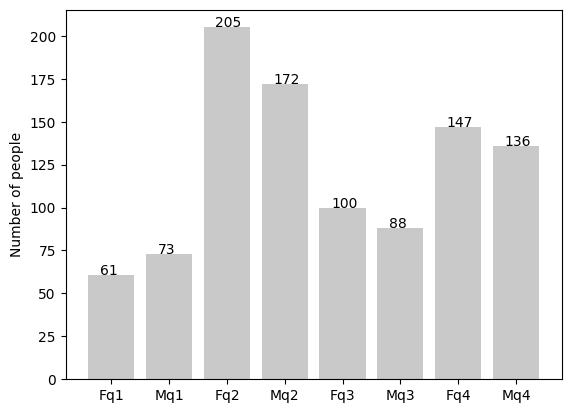

In [17]:
graphgen = [len(dtt["Female1"]), len(dtt["Male1"]), len(dtt["Female2"]), len(dtt["Male2"]), len(dtt["Female3"]), len(dtt["Male3"]), len(dtt["Female4"]), len(dtt["Male4"])]
colorr = (0.7,0.7,0.7,0.7)

x2 = np.arange(8)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Number of people')
plt.bar(x2, graphgen, color = colorr)
for i in range(len(graphgen)):
    plt.text(x = i-0.2, y = graphgen[i]+0.1, s = graphgen[i], size = 10)

plt.xticks(x2, ('Fq1', "Mq1", 'Fq2', "Mq2", 'Fq3', "Mq3", 'Fq4', "Mq4"))

In [ ]:
#We should focus on people around second quadrant (25-48) and fourth quardrant > 59

In [18]:
#check_unique()["Category"]
df["Category"].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: Category, dtype: int64

([<matplotlib.axis.XTick at 0x2523bc30ac0>,
 [Text(0, 0, 'Finance'),
  Text(1, 0, 'Manu'),
  Text(2, 0, 'Health'),
  Text(3, 0, 'Retail'),
  Text(4, 0, 'Property'),
  Text(5, 0, 'IT'),
  Text(6, 0, 'Entertain'),
  Text(7, 0, 'Agri'),
  Text(8, 0, 'Telecom')])

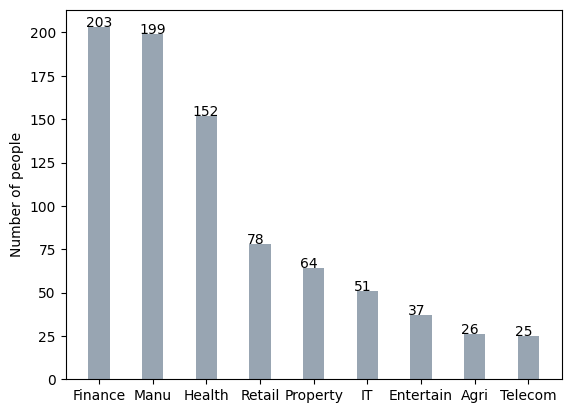

In [19]:
val = [203, 199, 152, 78, 64, 51, 37, 26, 25]
colorr = (0.2,0.3,0.4,0.5)

x3 = np.arange(9)
fig3, ax3 = plt.subplots()
ax3.set_ylabel('Number of people')
plt.bar(x3, val, color = colorr, width = 0.4)
for i in range(len(val)):
    plt.text(x = i-0.25, y = val[i]+0.1, s = val[i], size = 10)

plt.xticks(x3, ("Finance", "Manu", "Health", "Retail", "Property", "IT", "Entertain", "Agri", "Telecom"))

In [20]:
#split into 3: M (Mass), H(High), A(Affluent)
jjj = 1
wsm = {"q1":[], "q2":[], "q3":[], "q4":[]}
wsh = {"q1":[], "q2":[], "q3":[], "q4":[]}
wsa = {"q1":[], "q2":[], "q3":[], "q4":[]}

for each in df['wealth_segement']:
    temp = int(df['Age'][jjj])
    if each[0] == "M" and temp != 0:
        if(temp <= fq):
            wsm["q1"].append(temp)
        elif(fq < temp and temp <= sq):
            wsm["q2"].append(temp)
        elif(sq < temp and temp <= tq):
            wsm["q3"].append(temp)
        elif(tq < temp):
            wsm["q4"].append(temp)
    elif each[0] == "H" and temp != 0:
        if(temp <= fq):
            wsh["q1"].append(temp)
        elif(fq < temp and temp <= sq):
            wsh["q2"].append(temp)
        elif(sq < temp and temp <= tq):
            wsh["q3"].append(temp)
        elif(tq < temp):
            wsh["q4"].append(temp)
    elif each[0] == "A" and temp != 0:
        if(temp <= fq):
            wsa["q1"].append(temp)
        elif(fq < temp and temp <= sq):
            wsa["q2"].append(temp)
        elif(sq < temp and temp <= tq):
            wsa["q3"].append(temp)
        elif(tq < temp):
            wsa["q3"].append(temp)
    jjj += 1
print(len(wsm["q1"]), len(wsm["q2"]), len(wsm["q3"]), len(wsm["q4"]))
print(len(wsh["q1"]), len(wsh["q2"]), len(wsh["q3"]), len(wsh["q4"]))
print(len(wsa["q1"]), len(wsa["q2"]), len(wsa["q3"]), len(wsa["q4"]))

63 190 102 143
30 99 46 74
41 88 106 0


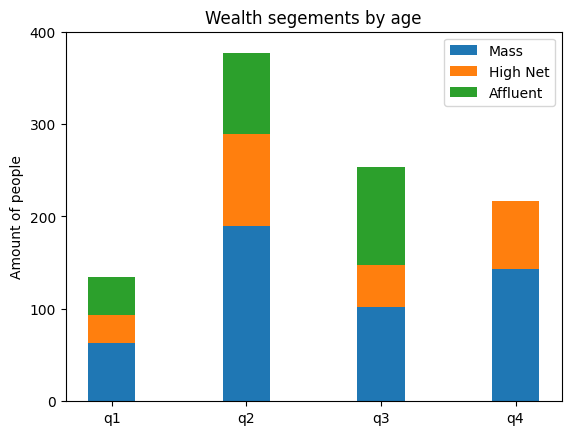

In [21]:
N = 4
wsmtp = [len(wsm["q1"]), len(wsm["q2"]), len(wsm["q3"]), len(wsm["q4"])]
wshtp = [len(wsh["q1"]), len(wsh["q2"]), len(wsh["q3"]), len(wsh["q4"])]
wsatp = [len(wsa["q1"]), len(wsa["q2"]), len(wsa["q3"]), len(wsa["q4"])]

bars = np.add(wsmtp, wshtp).tolist()
r = [0,1,2,3,4]

ind   = np.arange(N) # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, wsmtp, width)
p2 = plt.bar(ind, wshtp, width,  bottom=wsmtp)
p3 = plt.bar(ind, wsatp, width,  bottom=bars)

plt.ylabel('Amount of people')
plt.title('Wealth segements by age')
plt.xticks(ind, ('q1', 'q2', 'q3', 'q4'))
plt.yticks(np.arange(0, 500, 100))
plt.legend((p1[0], p2[0], p3[0]), ('Mass', 'High Net', 'Affluent'))

plt.show()

In [86]:
df["state"].value_counts()
nsw_car = 0
nsw_nc  = 0
vic_car = 0
vic_nc  = 0
qld_car = 0
qld_nc  = 0
idx     = 1
for es in df["state"]:
    if es == "NSW":
        if df["owns_car"][idx] == "Yes":
            nsw_car += 1
        else:
            nsw_nc  += 1
    elif es == "VIC":
        if df["owns_car"][idx] == "Yes":
            vic_car += 1
        else:
            vic_nc  += 1
    elif es == "QLD":
        if df["owns_car"][idx] == "Yes":
            qld_car += 1
        else:
            qld_nc  += 1
    idx += 1
            

([<matplotlib.axis.XTick at 0x1f24fcd6b38>,
 <a list of 6 Text xticklabel objects>)

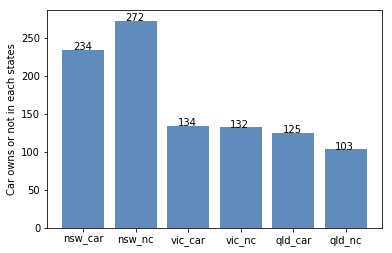

In [89]:
graphgen = [nsw_car, nsw_nc, vic_car, vic_nc, qld_car, qld_nc]
colorr = (0.3,0.5,0.7,0.9)

x2 = np.arange(6)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Car owns or not in each states')
plt.bar(x2, graphgen, color = colorr)
for i in range(len(graphgen)):
    plt.text(x = i-0.2, y = graphgen[i]+0.1, s = graphgen[i], size = 10)

plt.xticks(x2, ('nsw_car', "nsw_nc", 'vic_car', "vic_nc", 'qld_car', "qld_nc"))